In [73]:
import numpy as np
import pickle
import os
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

In [74]:
rootdir = os.fsdecode('agent_code/my_agent/Training_data/statistics')

stat_files = []

for file in os.listdir(rootdir):
    stat_files.append(os.fsdecode(rootdir + '/' + file))
    
print(stat_files)
raw_stats = []
for file in stat_files:
    raw_stats.append(pickle.load(open(file, 'rb')))

['agent_code/my_agent/Training_data/statistics/000_statistics.txt', 'agent_code/my_agent/Training_data/statistics/001_statistics.txt', 'agent_code/my_agent/Training_data/statistics/002_statistics.txt', 'agent_code/my_agent/Training_data/statistics/003_statistics.txt', 'agent_code/my_agent/Training_data/statistics/004_statistics.txt', 'agent_code/my_agent/Training_data/statistics/005_statistics.txt', 'agent_code/my_agent/Training_data/statistics/006_statistics.txt', 'agent_code/my_agent/Training_data/statistics/007_statistics.txt', 'agent_code/my_agent/Training_data/statistics/008_statistics.txt', 'agent_code/my_agent/Training_data/statistics/009_statistics.txt']


In [75]:
scores, survived, reward, time, steps = {}, {}, {}, {}, {}

statistics = {}

N_gen = 100*int(stat_files[0][45]) + 10*int(stat_files[0][46]) + int(stat_files[0][47])

for gen in raw_stats:
    gen_score, gen_survived, gen_reward, gen_time, gen_steps = np.array([]), np.array([]), np.array([]), np.array([]), np.array([])

    for ep in gen[0]:
        gen_score = np.append(gen_score, ep['score'])
        # gen_survived = np.append(gen_survived, ep['alive'])
        print(ep['steps'])
        if ep['steps'] < 399:
            gen_survived = np.append(gen_survived, False)
        else:
            gen_survived = np.append(gen_survived, True)
        gen_reward = np.append(gen_reward, ep['reward'])
        gen_time = np.append(gen_time, ep['mean_time'])
        gen_steps = np.append(gen_steps, ep['steps'])
    
    scores[N_gen] = gen_score
    survived[N_gen] = gen_survived
    reward[N_gen] = gen_reward
    time[N_gen] = gen_time
    steps[N_gen] = gen_steps
    N_gen += 1



6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
8
8
14
11
24
9
9
13
49
137
13
15
13
21
8
9
199
13
9
8
15
10
26
112
15
8
49
9
14
13
63
15
81
20
15
17
8
7
15
9
19
13
74
7
15
8
7
8
62
15
8
13
15
14
13
9
26
13
117
8
13
13
8
94
13
41
13
15
15
9
9
8
13
81
154
13
13
9
8
9
13
19
400
7
8
8
16
13
8
13
8
235
8
8
13
12
11
16
8
9
34
12
17
32
13
37
11
14
12
20
400
12
23
15
34
13
9
20
19
56
17
23
20
34
15
17
22
12
18
8
21
26
17
13
14
11
13
20
11
400
39
14
43
21
13
95
30
11
20
17
35
11
8
18
20
91
23
9
16
17
10
17
17
13
11
15
14
38
13
20
12
11
28
14
13
13
24
8
400
28
17
32
17
21
23
12
20
12
400
17
16
12
13
30
14
20
32
23
17
32
21
38
19
19
18
29
39
13
31
48
19
400
40
25
25
94
34
38
135
17
12
23
12
12
208
136
32
12
121
40
12
66
11
12
32
41
57
20
11
18
27
11
49
20
150
36
21
15
17
19
15
13
12
17
14
82
12
14
22
18
44
15
47
31
19
40
17
19
41
37
20
17
36
12
12

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9] [nan, 0.0, 0.0, 0.03, 0.04, 0.03, 0.06, 0.03, 0.03, 0.01]


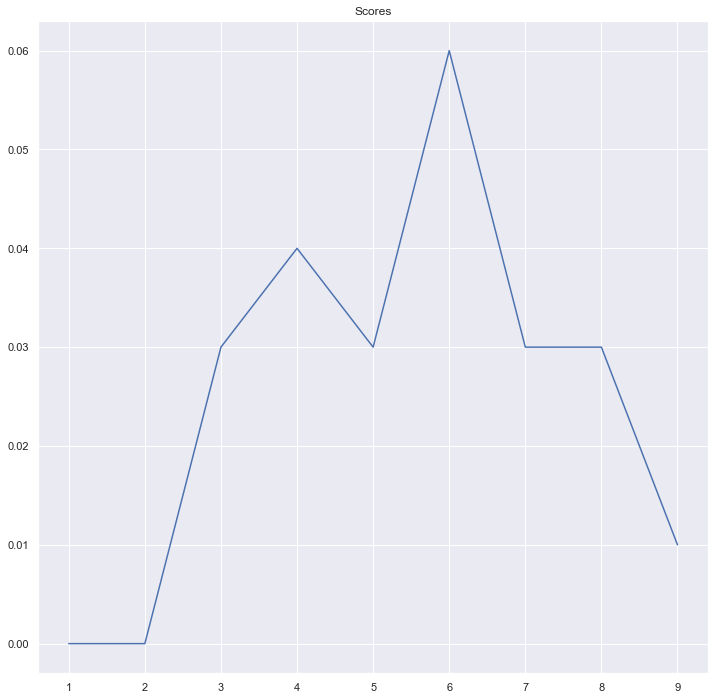

In [76]:
plt.figure(figsize=(12,12))
plt.title('Scores')
y_avg_scores = []
x_gen = []
for gen, sc in scores.items():
    x_gen.append(gen)
    y_avg_scores.append(np.mean(sc))
print(x_gen, y_avg_scores)
plt.plot(x_gen, y_avg_scores, label='gen_1')
plt.show()

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9] [nan, 0.0, 0.01, 0.04, 0.01, 0.01, 0.02, 0.0, 0.05, 0.05]


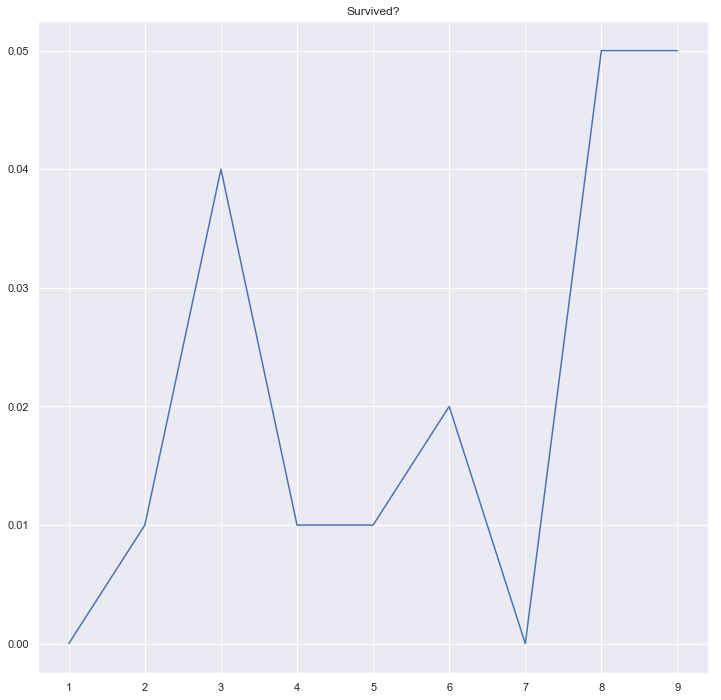

In [77]:
#scores, survived, reward, time, steps
plt.figure(figsize=(12,12))
plt.title('Survived?')
y_avg_survived = []
x_gen = []
for gen, sc in survived.items():
    x_gen.append(gen)
    y_avg_survived.append(np.mean(sc))
print(x_gen, y_avg_survived)
plt.plot(x_gen, y_avg_survived, label='gen_1')
plt.show()

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9] [nan, -3830.48, -3312.96, -3286.23, -3743.23, -3728.92, -3368.22, -3449.65, -3797.28, -3684.48]


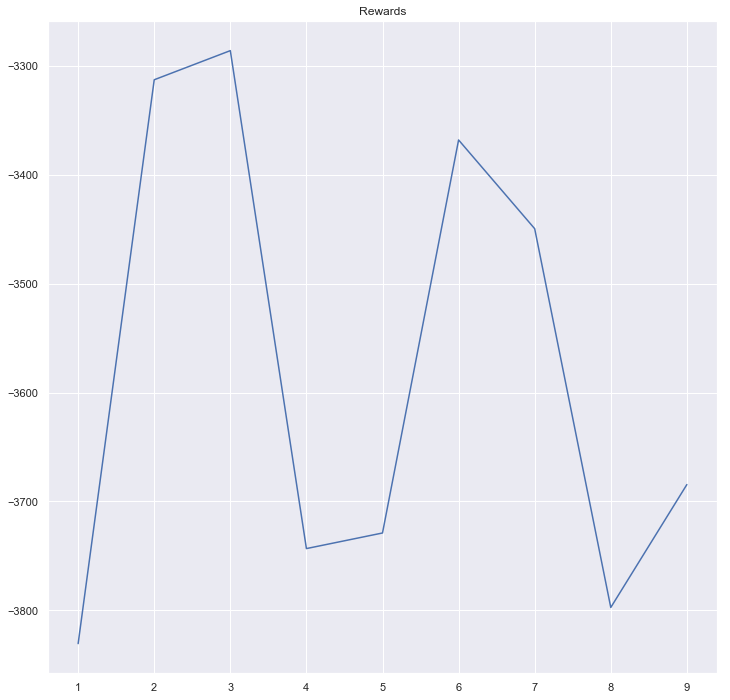

In [78]:
#scores, survived, reward, time, steps
plt.figure(figsize=(12,12))
plt.title('Rewards')
y_avg_rewards = []
x_gen = []
for gen, rew in reward.items():
    x_gen.append(gen)
    y_avg_rewards.append(np.mean(rew))
print(x_gen, y_avg_rewards)
plt.plot(x_gen, y_avg_rewards, label='gen_1')
plt.show()

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9] [nan, 6.0, 29.59, 35.85, 38.65, 31.72, 33.24, 29.62, 43.13, 39.88]


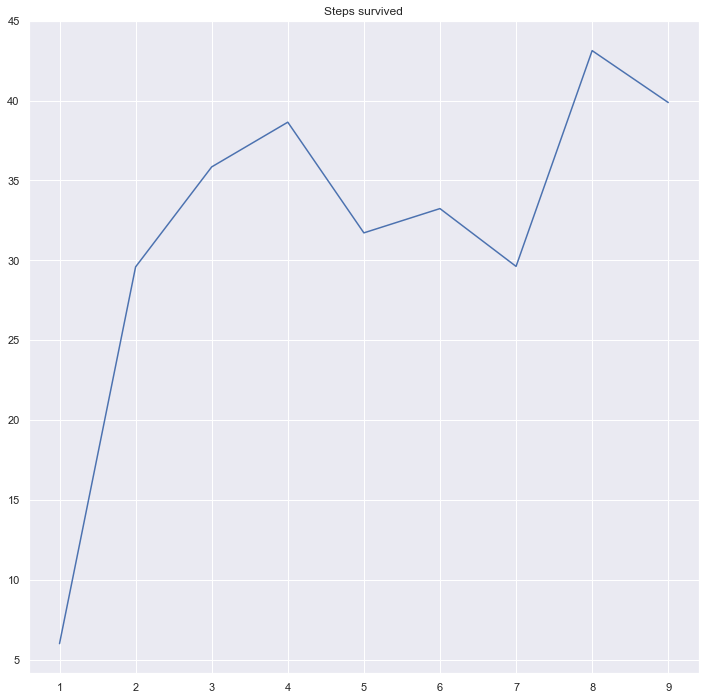

In [79]:
#scores, survived, reward, time, steps
plt.figure(figsize=(12,12))
plt.title('Steps survived')
y_avg_steps = []
x_gen = []
for gen, step in steps.items():
    x_gen.append(gen)
    y_avg_steps.append(np.mean(step))
print(x_gen, y_avg_steps)
plt.plot(x_gen, y_avg_steps, label='gen_1')
plt.show()

In [80]:
rootdir = os.fsdecode('agent_code/my_agent/Training_data/trees')

stat_files = []

for file in os.listdir(rootdir):
    stat_files.append(os.fsdecode(rootdir + '/' + file))
    
print(stat_files[-5])
regressor_BOMB = pickle.load(open(stat_files[-6], 'rb'))
regressor_DOWN = pickle.load(open(stat_files[-5], 'rb'))
regressor_LEFT = pickle.load(open(stat_files[-4], 'rb'))
regressor_RIGHT = pickle.load(open(stat_files[-3], 'rb'))
regressor_UP = pickle.load(open(stat_files[-2], 'rb'))
regressor_WAIT = pickle.load(open(stat_files[-1], 'rb'))
print('regressors loaded')

agent_code/my_agent/Training_data/trees/031_DOWN.txt
regressors loaded


C:\Users\karlt\Anaconda3\envs\ml_homework\lib\site-packages\sklearn\base.py:251: UserWarning: Trying to unpickle estimator DecisionTreeRegressor from version 0.19.2 when using version 0.20.0. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
C:\Users\karlt\Anaconda3\envs\ml_homework\lib\site-packages\sklearn\base.py:251: UserWarning: Trying to unpickle estimator DecisionTreeRegressor from version 0.19.2 when using version 0.20.0. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
C:\Users\karlt\Anaconda3\envs\ml_homework\lib\site-packages\sklearn\base.py:251: UserWarning: Trying to unpickle estimator DecisionTreeRegressor from version 0.19.2 when using version 0.20.0. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
C:\Users\karlt\Anaconda3\envs\ml_homework\lib\site-packages\sklearn\base.py:251: UserWarning: Trying to unpickle estimator DecisionTreeRegressor from vers

In [81]:
print(np.argsort(regressor_BOMB.feature_importances_))
print(np.argsort(regressor_WAIT.feature_importances_))

[265 221 222 225 228 230 231 234 237 240 245 247 249 252 254 219 255 260
 261 263 264 266 267 270 273 276 279 282 285 286 287 259 218 217 216 150
 153 154 159 161 162 164 165 167 171 177 180 181 183 185 186 188 215 213
 212 211 210 209 288 207 204 201 200 195 192 189 205 289 290 291 382 390
 396 399 400 404 412 423 429 435 440 441 444 446 450 460 462 526 523 518
 517 511 510 381 505 487 484 481 470 468 464 499 147 376 374 294 297 303
 304 308 309 311 312 315 318 326 327 329 330 335 336 338 372 371 370 368
 366 363 375 361 358 354 353 348 343 341 360 141 531  99  40  63 129 128
  43  46  67  60  57  48 120  51  54 122 126  27 132  73   1   3   4  96
  95 105  93  90  87 123  21  84  78 307 202 407 383  62 296 182 496 402
 139 324 447 281 155 293 227 125 144  49 332 414  15  92 241 431 298 507
 365 302 224 356 179 516 364 385 258 235 239 301 251 176 108 284 351 170
 506 138 277  37 418 257 229  52 521 151 508 149 501 443 106 248 191  81
 504  98 362 319 156 384  23  56 492 131 274 173  7

In [82]:
import numpy as np

tester = np.arange(5)
gammas = 0.9**np.arange(tester.shape[0])
output = []
for y in range(tester.shape[0]):
    output.append(np.sum(tester[y:]*gammas[:tester.shape[0]-y]))

print (tester)
print (output)
print (0.9+0.9**2*2+0.9**3*3+0.9**4*4)

[0 1 2 3 4]
[7.3314, 8.146, 7.94, 6.6, 4.0]
7.3314
